# Sprint 2 - Análisis exploratorio y visual de Insurance dataset

# 2.0. Importación Dataset

In [264]:
# importamos fichero local
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


# 2.1. Análisis exploratorio

---





In [294]:
#analisis exploratorio
import pandas as pd

In [323]:
#creamos variable con dataset
import io
insurance_data = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [324]:
#exploracion del dataset
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [325]:
#exploracion de las primeras líneas dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [326]:
#consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
insurance_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [327]:
#consultamos el numero de filas y columnas
insurance_data.shape

(1338, 7)

In [328]:
#consultamos si tenemos celdas sin valor
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [329]:
#nombre de las columnas
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [330]:
#consultamos el tipo de cada columna
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [331]:
#Resumen exploracion del dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Conclusión análisis exploratorio**:

Los datos no contienen ningún valor nulo, sin embargo, hay 3 columnas (sexo, fumador y región) que tienen un tipo de dato objeto que necesitará ser cambiado al utilizar algoritmos de aprendizaje. En este análisis exploratorio he mantenido todos los datos, ya que permite un análisis más explicativo.
Por otro lado, las edades de este conjunto de datos objeto de análisis están comprendidas entre 18 y 64 años.

# 2.2. Análisis visual

---




In [332]:
# análisis visual
import matplotlib.pyplot as plt
import seaborn as sns

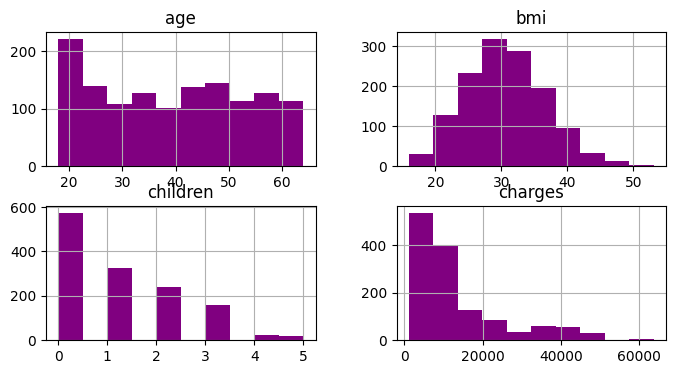

In [333]:
# Visualización histogramas posibles
insurance_data.hist(figsize=(8,4), color='purple')
plt.show()

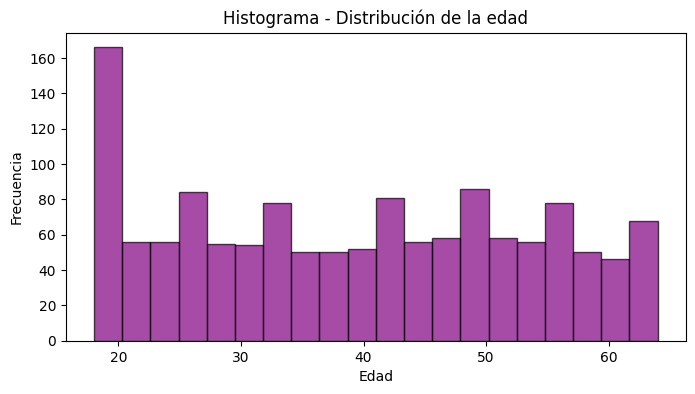

In [334]:
# Histograma de la distribución de la edad
plt.figure(figsize=(8, 4))
plt.hist(insurance_data['age'], bins=20, edgecolor='k', alpha=0.7, color='purple')
plt.title('Histograma - Distribución de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

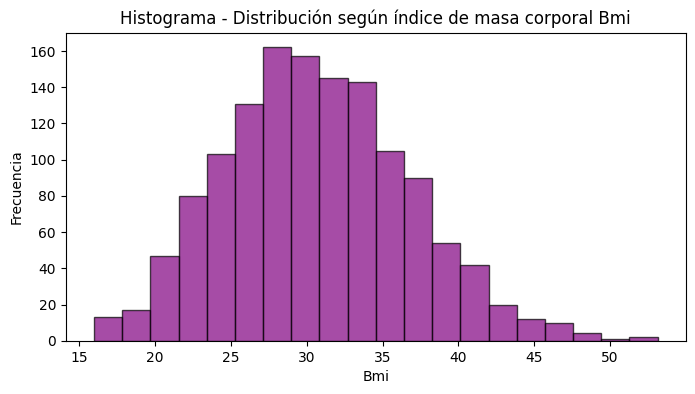

In [335]:
# Histograma de la distribución según Bmi
plt.figure(figsize=(8, 4))
plt.hist(insurance_data['bmi'], bins=20, edgecolor='k', alpha=0.7, color='purple')
plt.title('Histograma - Distribución según índice de masa corporal Bmi')
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

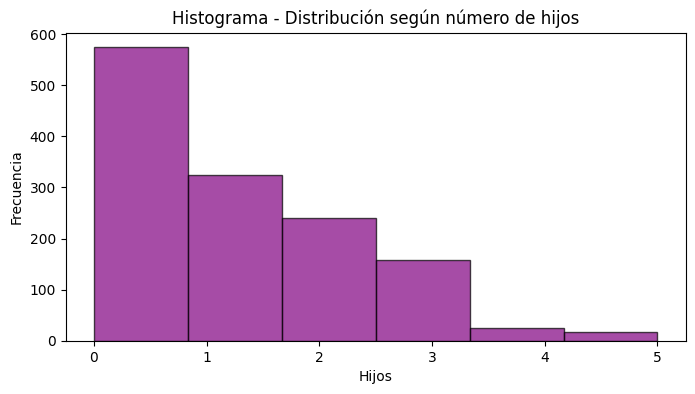

In [336]:
# Histograma de la distribución según número de hijos
plt.figure(figsize=(8, 4))
plt.hist(insurance_data['children'], bins=6, edgecolor='k', alpha=0.7, color='purple')
plt.title('Histograma - Distribución según número de hijos')
plt.xlabel('Hijos')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

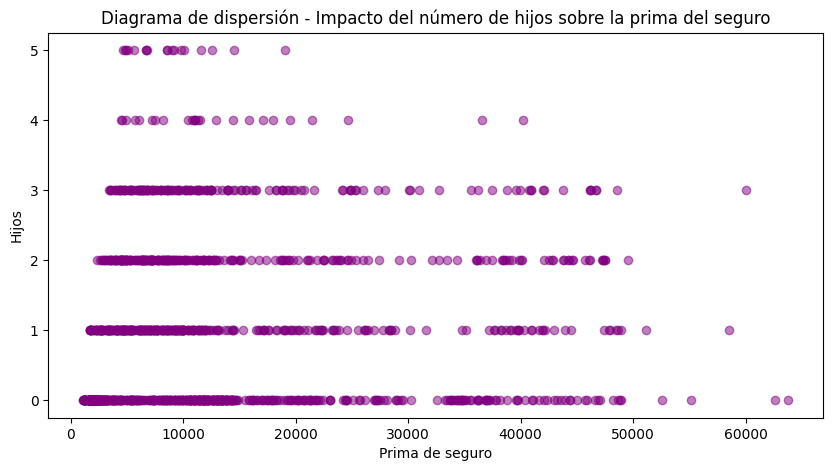

In [337]:
# Visualización diagrama de dispersión (scatter plot)
plt.figure(figsize=(10, 5))
plt.scatter(insurance_data['charges'], insurance_data['children'], alpha=0.5, color='purple')
plt.title('Diagrama de dispersión - Impacto del número de hijos sobre la prima del seguro')
plt.xlabel('Prima de seguro')
plt.ylabel('Hijos')
plt.grid(False)
plt.show()

Según los datos no parece haber suficientes datos para aquellas personas con más de 3 hijos y no podemos sacar conclusiones en cuanto a que tener más o menos hijos afecte al precio del seguro. Por lo tanto, es necesario seguir analizando otras variables.

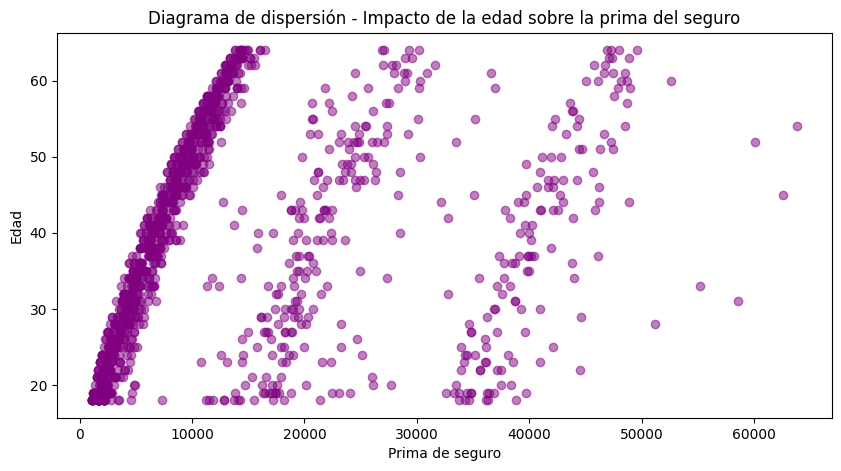

In [338]:
# Visualización diagrama de dispersión (scatter plot)
plt.figure(figsize=(10, 5))
plt.scatter(insurance_data['charges'], insurance_data['age'], alpha=0.5, color='purple')
plt.title('Diagrama de dispersión - Impacto de la edad sobre la prima del seguro')
plt.xlabel('Prima de seguro')
plt.ylabel('Edad')
plt.grid(False)
plt.show()


La mayoría de los puntos siguen una tendencia similar en la que cuanto más edad tenga una persona, más altas son sus facturas médicas. Aunque la mayoría de los puntos de datos se concentran en el primer rango, hay varios puntos que están muy fuera de lo normal.

Para investigar esto más a fondo, desglosamos a continuación los datos según sexo o región, esto no aporta información relevante al análisis. En cambio, al visualizar los puntos según si la persona es fumadora, encontramos una gran diferencia en las facturas médicas dependiente a si una persona es fumadora o no.

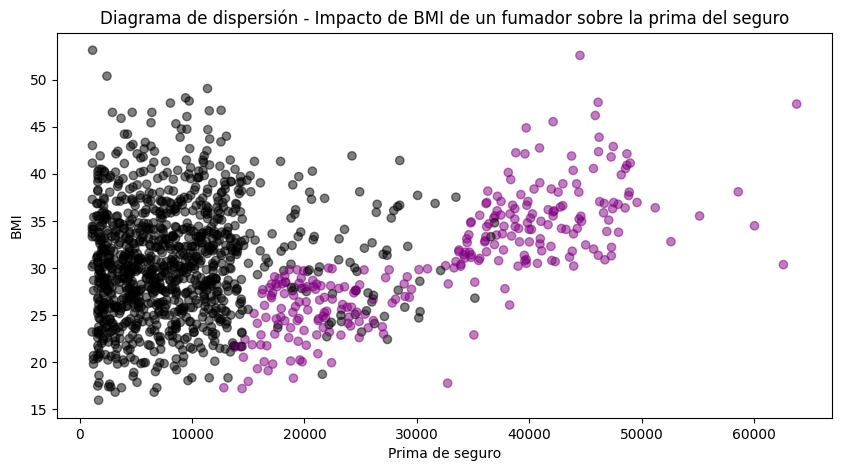

In [339]:
# Asignamos colores a los fumadores y no fumadores
colors = {'yes': 'purple', 'no': 'black'}
insurance_data['smoker_color'] = insurance_data['smoker'].map(colors)

# Visualización diagrama de dispersión (scatter plot)
plt.figure(figsize=(10, 5))
plt.scatter(insurance_data['charges'], insurance_data['bmi'], c=insurance_data['smoker_color'], alpha=0.5)
plt.title('Diagrama de dispersión - Impacto de BMI de un fumador sobre la prima del seguro')
plt.xlabel('Prima de seguro')
plt.ylabel('BMI')
plt.grid(False)

# Mostrar el gráfico
plt.show()


Si observamos este diagrama de dispersión concluimos que la prima de seguro de un fumador (color morado) y el BMI tiene una alta correlación, en cambio para los no fumadores (color negro) no parece tener relación.

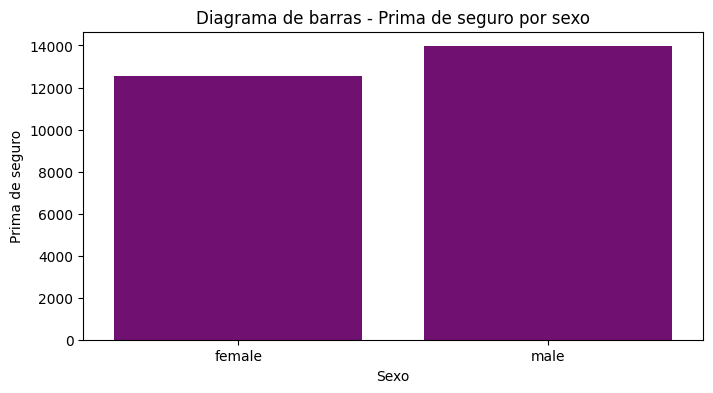

In [340]:
# Visualización diagrama de barras prima según sexo
plt.figure(figsize=(8, 4))
sns.barplot(data=insurance_data, x='sex', y='charges', color='purple', errorbar=None)
plt.title('Diagrama de barras - Prima de seguro por sexo')
plt.xlabel('Sexo')
plt.ylabel('Prima de seguro')
plt.show()

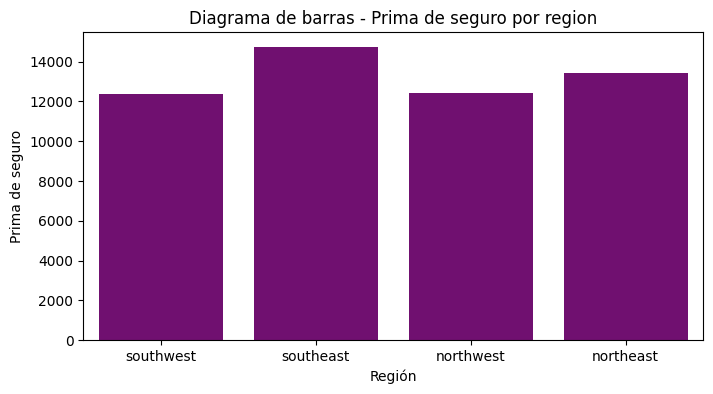

In [341]:
# Visualización diagrama de barras prima según región
plt.figure(figsize=(8, 4))
sns.barplot(data=insurance_data, x='region', y='charges', color='purple', errorbar=None)
plt.title('Diagrama de barras - Prima de seguro por region')
plt.xlabel('Región')
plt.ylabel('Prima de seguro')
plt.show()

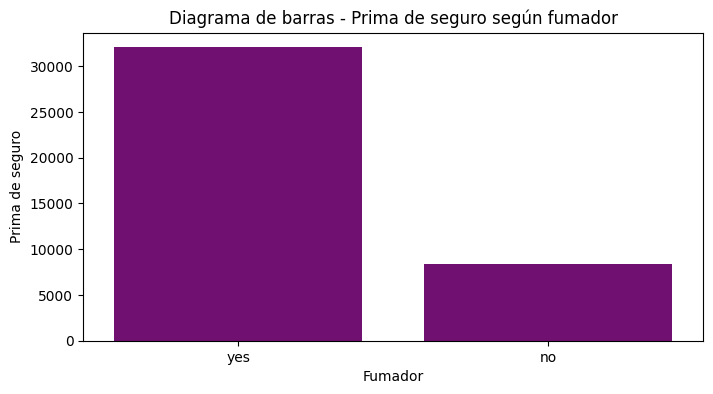

In [342]:
# Visualización diagrama de barras prima según fumador
plt.figure(figsize=(8, 4))
sns.barplot(data=insurance_data, x='smoker', y='charges', color='purple', errorbar=None)
plt.title('Diagrama de barras - Prima de seguro según fumador')
plt.xlabel('Fumador')
plt.ylabel('Prima de seguro')
plt.show()

<ipython-input-343-a59a0990d646>:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.barplot(data=insurance_data, x='region', y='charges', hue='smoker', color='purple', errorbar=None)


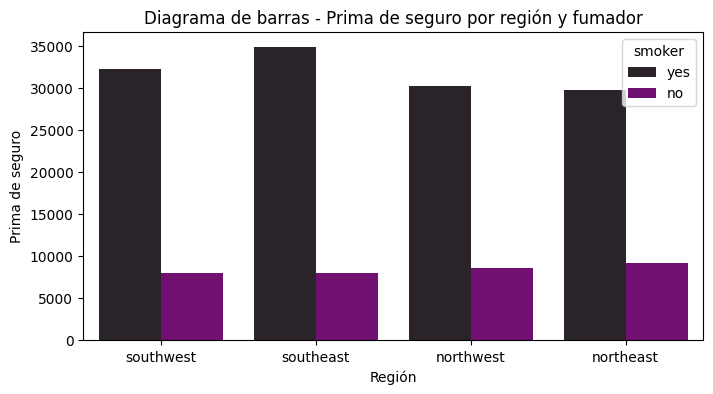

In [343]:
# Visualización diagrama de barras prima según región y fumador
plt.figure(figsize=(8, 4))
sns.barplot(data=insurance_data, x='region', y='charges', hue='smoker', color='purple', errorbar=None)
plt.title('Diagrama de barras - Prima de seguro por región y fumador')
plt.xlabel('Región')
plt.ylabel('Prima de seguro')
plt.show()

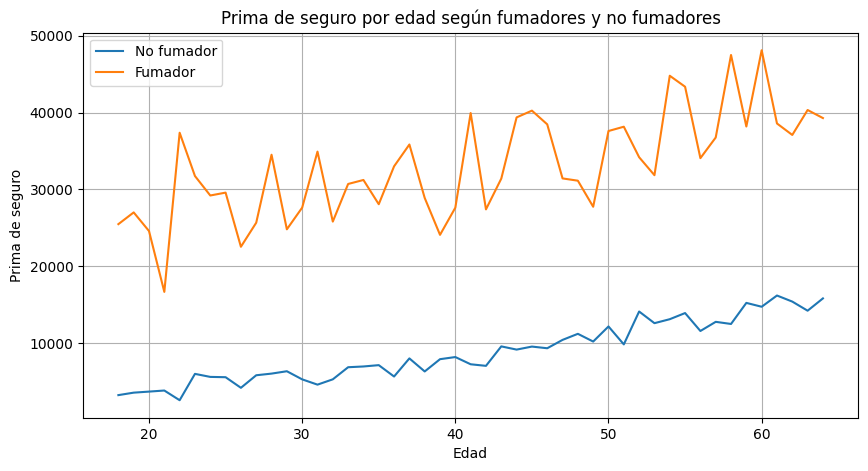

Avg. Prima fumadores 32050
Avg. Prima no fumadores 8434


In [344]:
# # Análisis Fumadores ##
# Calculamos la prima de seguro promedia para cada edad y fumadores
avg_charges = insurance_data.groupby(['smoker', 'age'])['charges'].mean().reset_index()

# Fumadores y no fumadores para cada edad
smokers = avg_charges[avg_charges['smoker'] == 'yes']
non_smokers = avg_charges[avg_charges['smoker'] == 'no']

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 5))

# Ploteamos la prima de seguro promedio para los no fumadores
plt.plot(non_smokers['age'], non_smokers['charges'], label='No fumador')

# Ploteamos la prima de seguro promedio para los fumadores
plt.plot(smokers['age'], smokers['charges'], label='Fumador')

# Añadir etiquetas y título
plt.title('Prima de seguro por edad según fumadores y no fumadores')
plt.xlabel('Edad')
plt.ylabel('Prima de seguro')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

print("Avg. Prima fumadores", round(insurance_data[insurance_data['smoker'] == 'yes']['charges'].mean()))
print("Avg. Prima no fumadores", round(insurance_data[insurance_data['smoker'] == 'no']['charges'].mean()))

En esta visualización podemos ver el impacto directo que tiene en el precio de la prima de seguros la condición de que el asegurado sea fumador o no. De esta forma vemos que los fumadores pagan unas primas por seguro médico 3 veces superior a las que paga un no fumador.

Como mencionamos anteriormente en la fase de análisis exploratorio, este conjunto de datos cuenta con 3 columnas objeto que necesitamos convertir en valores numéricos y poder trabajar con un mapa de correlación.

In [345]:
# Definimos diccionarios de mapeo
sex_mapping = {'male': 1, 'female': 0}
smoker_mapping = {'yes': 1, 'no': 0}
region_mapping = {"southwest": 1, "southeast": 2, "northwest": 3, "northeast": 4}

# Aplicamos el mapeo a las columnas correspondientes
insurance_data['sex'] = insurance_data['sex'].map(sex_mapping)
insurance_data['smoker'] = insurance_data['smoker'].map(smoker_mapping)
insurance_data["region"] = insurance_data["region"].map(region_mapping)

insurance_data.drop(columns=['smoker_color'], inplace=True)

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


<Figure size 1000x500 with 0 Axes>

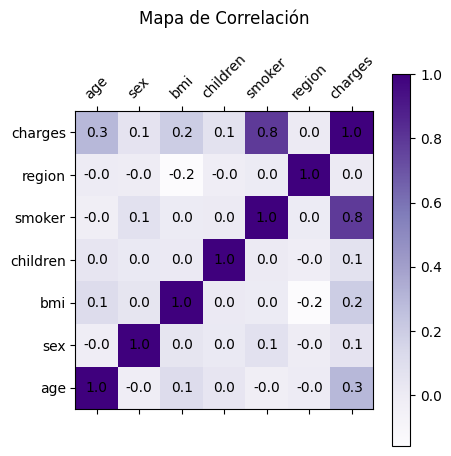

In [348]:
# Mapa de correlación de las variables numéricas
plt.figure(figsize=(10, 5))
correlation_matrix = insurance_data.corr()
cax = plt.matshow(correlation_matrix, cmap='Purples')

# Invertir el eje y
plt.gca().invert_yaxis()

# Añadir los data labels dentro de cada cuadro
for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, f'{val:.1f}', ha='center', va='center', color='black')

plt.colorbar(cax)
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Mapa de Correlación', pad=20)
plt.show()

Ser fumador y la edad parecen estar fuertemente correlacionados con el coste de las primas de seguros, mientras que otras columnas muestran una correlación mínima.

# 2.3. Conclusión final


Este análisis revela que el ser fumador tiene una influencia significativa en la prima de seguros médicos, con una tendencia creciente a medida que la edad aumenta. La segmentación por sexo o región no aporta información relevante, pero al considerar si una persona es fumadora, también encontramos una marcada diferencia en las primas de seguros.
Además, el diagrama de dispersión sugiere una alta correlación entre ser fumador y el BMI en las primas de seguro, mientras que para los no fumadores no parece existir una relación.

Los fumadores pagan primas considerablemente más altas que los no fumadores, siendo este último factor un determinante clave en el precio de las primas de seguro médico.

En resumen, el análisis exploratorio demuestra cómo la edad, el hábito de fumar y el BMI pueden influir en el precio de las primas de un seguro médico.